In [2]:
import pandas as pd
from itertools import chain, combinations
from collections import Counter
from datetime import datetime

In [ ]:
data = pd.read_csv("basket_data.csv", sep='\t', header=None, index_col=False, names=['Items'])
new_data = data['Items'].str.split(',', expand = True)

In [ ]:
new_data

,0,1,2,3
0,ketchup,butter,diapers,None
1,bread,diapers,ketchup,None
2,butter,bread,ketchup,None
3,diapers,butter,None,None
4,ketchup,butter,diapers,beer
...,...,...,...,...
95,beer,diapers,bread,butter
96,beer,ketchup,bread,milk
97,diapers,ketchup,None,None
98,ketchup,diapers,bread,beer


In [ ]:
given_sets = []
for val in data.itertuples():
  given_sets.append(val[1])


Question 2

---



1)

In [ ]:
def cardinality_items(unique_items):
  all_items =[]
  new_list=[]
  all_items.extend(new_data[0].to_list())
  all_items.extend(new_data[1].to_list())
  all_items.extend(new_data[2].to_list())
  all_items.extend(new_data[3].to_list())
  for val in all_items:
    if(type(val) == str):
      newString=val.strip()
      new_list.append(newString)
  unique_items[:] = list(set(new_list))
  num_unique_items = len(unique_items)-1
  print("Cardinality of the full set of unique items : ", num_unique_items)
  
  

2) 2ᴺ - 1


3)

In [ ]:
def all_itemsets(all_sets, data):
  all_sets[:] = chain.from_iterable(combinations(data, r) for r in range(int((len(data)+1)/2)))
  print("list of all possible sets : ", len(all_sets)-1)
  

4)

In [ ]:
def prob_S(set_to_check, given_sets):
  counter = given_sets.count(set_to_check)
  return counter/100

Answers

---



In [ ]:
unique_items = []
all_sets = []
cardinality_items(unique_items)
all_itemsets(all_sets, unique_items)
set_to_check = 'ketchup, butter, diapers'
probability = prob_S(set_to_check, given_sets)
print("Probability of occuarance : ", probability)

Cardinality of the full set of unique items :  20
list of all possible sets :  1048575
Probability of occuarance :  0.03


Question 3

---



Q1)

In [11]:
movie_data = pd.read_csv("movie_titles.csv", header=None, index_col=False, names=['Index','Year','Movies'], encoding = "ISO-8859-1")

In [12]:
len(movie_data)

17770

Q2)

In [ ]:
## Adding just two files, otherwise data becomes too large to process
## Files not processed : 'combined_data_3.txt','combined_data_4.txt'
files = ['combined_data_1.txt','combined_data_2.txt']

In [ ]:
mainDF = pd.DataFrame()
for f in files:
  data = pd.read_csv(f, header=None, index_col=False, names=['UserID','Rating','Dates'])
  df = pd.DataFrame(data)
  mainDF = mainDF.append(df)

In [ ]:
mainDF = mainDF[mainDF["UserID"].str.contains(":")==False]
mainDF["UserID"] = pd.to_numeric(mainDF['UserID'])
mainDF["Rating"] = pd.to_numeric(mainDF['Rating'])
mainDF["Dates"] = pd.to_datetime(mainDF['Dates'])
mainDF

,UserID,Rating,Dates
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26
5,823519,3.0,2004-05-03
...,...,...,...
26982297,2420260,1.0,2003-12-01
26982298,761176,3.0,2004-06-06
26982299,459277,3.0,2005-02-25
26982300,2407365,4.0,2005-04-29


In [ ]:
import altair as alt
alt.Chart(mainDF.head(4999)).mark_point().encode(
    x='Dates',
    y='UserID',
    color='Rating',
).interactive()

alt.Chart(...)

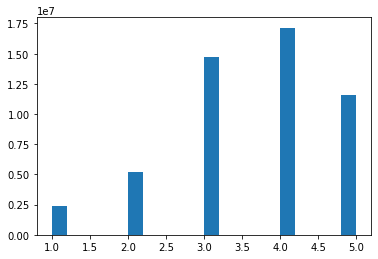

In [ ]:
import matplotlib.pyplot as plt

plt.hist(mainDF["Rating"], bins=20)
plt.show()

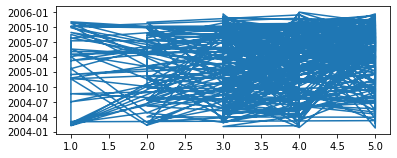

In [ ]:
ax1 = plt.subplot2grid((5, 2), (1, 0), rowspan=3, colspan=2)
ax1.plot(mainDF["Rating"].head(500), mainDF["Dates"].head(500))
plt.show()

Q3)

In [4]:
qualify = pd.read_csv("qualifying.txt", header=None, index_col=False, names=["Users", "Dates"])
len(qualify)

2834601

In [18]:
movieCount = 0
for val in qualify["Users"]:
  if ":" in val:
    movieCount += 1
(movieCount/len(movie_data))*100

98.31176139561057

Q4)

In [19]:
movieMap = {}
for movie in movie_data["Movies"]:
  if movie in movieMap:
    movieMap[movie] += 1
  else:
    movieMap[movie] = 1
  

In [21]:
multiRls = 0
for key in movieMap.keys():
  if movieMap[key] > 1:
    multiRls += 1
multiRls

401

In [10]:
qualify["Dates"] = pd.to_datetime(qualify["Dates"])
qualify['Years'] = qualify['Dates'].dt.strftime('%Y')
yearMap = {}
for d in qualify["Years"]:
  if d == None:
    continue
  else:
    if d in yearMap:
      yearMap[d] += 1
    else:
      yearMap[d] = 1


In [37]:
from operator import index
yearDF = pd.DataFrame(yearMap.items(), columns=["Years","Count"])
yearDF.dropna()

,Years,Count
1,2005,2606654
2,2004,176800
3,2003,23341
4,2002,7004
5,2001,2179
6,2000,1153


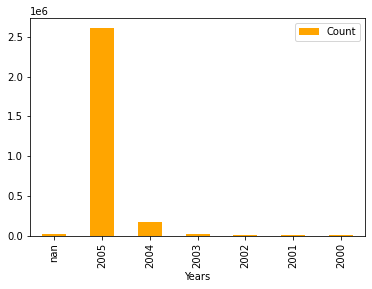

In [38]:
yearDF.plot.bar(x="Years", y="Count", color="orange")

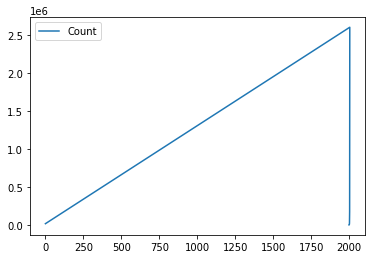

In [36]:
yearDF.plot.line()